## Testing

First thing that is to be done is to import the data and generate splits

In [20]:
from prep import plot_conf_mat
from sklearn.metrics import confusion_matrix
import pandas as pd

# Data has already been split and cleaned
train_df = pd.read_csv('../Datasets/train_cleaned.csv')
X_train = train_df['body']
y_train = train_df['subreddit']
y_train = y_train.map({'Toronto': 0, 'London': 1, 'Paris': 2, 'Montreal': 3})

test_df = pd.read_csv('../Datasets/test_cleaned.csv')
X_test = test_df['body']
y_test = test_df['subreddit']
y_test = y_test.map({'Toronto': 0, 'London': 1, 'Paris': 2, 'Montreal': 3})

Naive Bayes Classifier

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Accuracy:  0.7161820699203877
Test Accuracy:  0.6333333333333333
Class Distribution
1    0.316667
2    0.300000
0    0.250000
3    0.133333
Name: proportion, dtype: float64


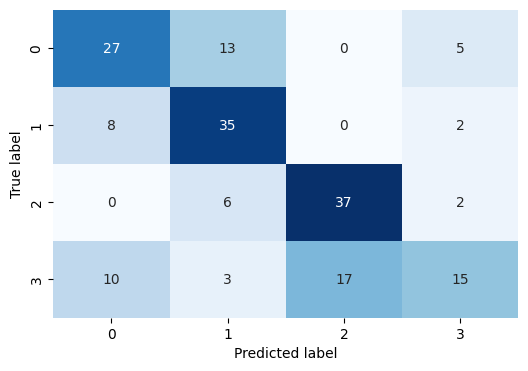

In [21]:
# Perform a thorough grid search with CountVectorizer and Naive Bayes
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

# Define the pipeline with CountVectorizer and Multinomial Naive Bayes
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=3000)),
    ('classifier', MultinomialNB())
])

# Define the hyperparameters to search
parameters = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Consider different n-gram ranges
    'classifier__alpha': [0.01, 0.5, 1.0],  # Smoothing parameter for Naive Bayes
    'classifier__fit_prior': [True, False],  # Whether to learn class prior probabilities
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Assign model to a variable
best_mnb = grid_search.best_estimator_

# Print the best parameters and corresponding accuracy
print("Best Accuracy: ", grid_search.best_score_)
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Print distribution of y_pred
y_pred = grid_search.predict(X_test)

print('Class Distribution')
print(pd.Series(y_pred).value_counts(normalize=True))

conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

Logistic Regression Classifier

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters:  {'classifier__C': 0.1, 'vectorizer__ngram_range': (1, 1)}
Best Accuracy:  0.7199030806507443
Test Accuracy:  0.6833333333333333
Class Distribution
0    0.288889
1    0.277778
2    0.250000
3    0.183333
Name: proportion, dtype: float64


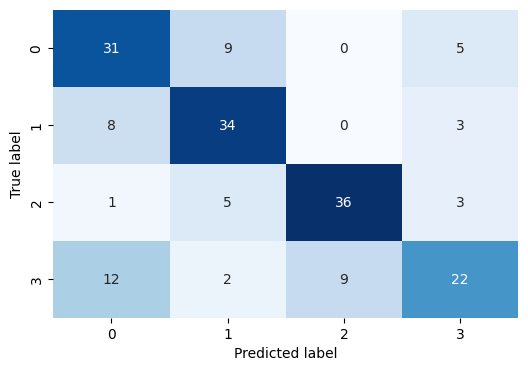

In [22]:
# Perform a thorough grid search with CountVectorizer and Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Define the pipeline with CountVectorizer and Logistic Regression
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=3000)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define the hyperparameters to search
parameters = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Consider different n-gram ranges
    'classifier__C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data and labels

# Assign model to a variable
best_lr = grid_search.best_estimator_

# Print the best parameters and corresponding accuracy
print('Best Parameters: ', grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Print distribution of y_pred
y_pred = grid_search.predict(X_test)
    
print('Class Distribution')
print(pd.Series(y_pred).value_counts(normalize=True))

conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

Multi-Layer Perceptron

In [23]:
'''# Train a MLP
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the pipeline with CountVectorizer and Multilayer Perceptron
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=3000)),
    ('classifier', MLPClassifier())
])

# Define the hyperparameters to search
parameters = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Consider different n-gram ranges
    'classifier__hidden_layer_sizes': [(100,), (300, 150), (200, 100), (200, 100, 50), (100, 50, 25)],  # Vary hidden layer sizes
    'classifier__alpha': [0.001],  # L2 regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Assign model to a variable
best_mlp = grid_search.best_estimator_

# Print the best parameters and corresponding accuracy
print("Best Accuracy: ", grid_search.best_score_)
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Print distribution of y_pred
y_pred = grid_search.predict(X_test)
print('Class Distribution')
print(pd.Series(y_pred).value_counts(normalize=True))

conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)'''

'# Train a MLP\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.preprocessing import StandardScaler\n\n# Define the pipeline with CountVectorizer and Multilayer Perceptron\npipeline = Pipeline([\n    (\'vectorizer\', TfidfVectorizer(max_features=3000)),\n    (\'classifier\', MLPClassifier())\n])\n\n# Define the hyperparameters to search\nparameters = {\n    \'vectorizer__ngram_range\': [(1, 1), (1, 2), (1, 3)],  # Consider different n-gram ranges\n    \'classifier__hidden_layer_sizes\': [(100,), (300, 150), (200, 100), (200, 100, 50), (100, 50, 25)],  # Vary hidden layer sizes\n    \'classifier__alpha\': [0.001],  # L2 regularization strength\n}\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(pipeline, parameters, cv=5, scoring=\'accuracy\', verbose=1, n_jobs=-1)\n\n# Perform the grid search\ngrid_search.fit(X_trai

SVM

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Accuracy:  0.7291277258566977
Test Accuracy:  0.6611111111111111
Class Distribution
0    0.300000
2    0.294444
1    0.255556
3    0.150000
Name: proportion, dtype: float64


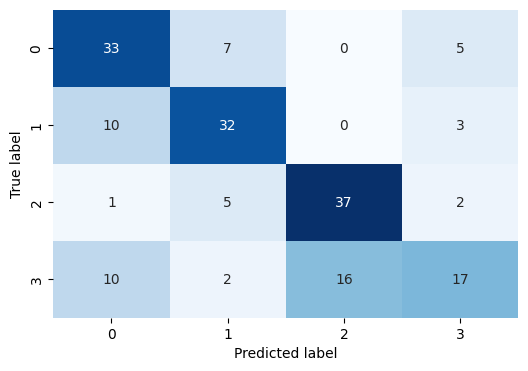

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

svm_model = SVC()

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC())
])

parameters = {
    'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],  # Consider different n-gram ranges
    'classifier__C': [10, 20, 30],  # Regularization parameter
    'classifier__degree': [2, 3, 4],  # Degree of the polynomial kernel
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Assign model to a variable
best_svm = grid_search.best_estimator_

# Print the best parameters and corresponding accuracy
print("Best Accuracy: ", grid_search.best_score_)
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Print distribution of y_pred
y_pred = grid_search.predict(X_test)
print('Class Distribution')
print(pd.Series(y_pred).value_counts(normalize=True))

conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

Bernoulli Naive Bayes Classifier

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Accuracy:  0.6808930425752855
Test Accuracy:  0.6388888888888888
Class Distribution
2    0.300000
1    0.288889
0    0.288889
3    0.122222
Name: proportion, dtype: float64


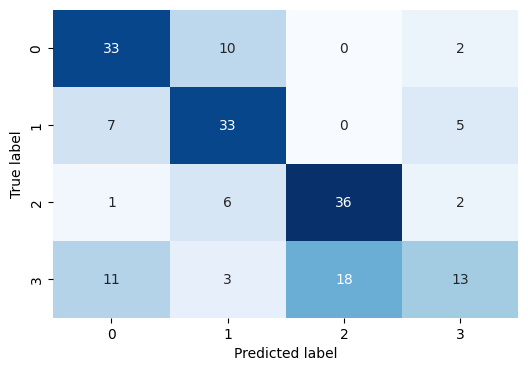

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import BernoulliNB

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', OneVsRestClassifier(BernoulliNB())) 
])

param_grid = {
    'vectorizer__max_features': [1000, 3000, 5000], 
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)], 
    'classifier__estimator__alpha': [0.001, 0.5, 1.0],  
}

# Create GridSearchCV instance
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Assign model to a variable
best_bnb = grid_search.best_estimator_

# Print the best parameters and corresponding accuracy
print("Best Accuracy: ", grid_search.best_score_)
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Print distribution of y_pred
y_pred = grid_search.predict(X_test)
print('Class Distribution')
print(pd.Series(y_pred).value_counts(normalize=True))

conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

Random Forest

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Best Accuracy:  0.7161301488404292
Test Accuracy:  0.65
Class Distribution
2    0.305556
1    0.283333
0    0.261111
3    0.150000
Name: proportion, dtype: float64


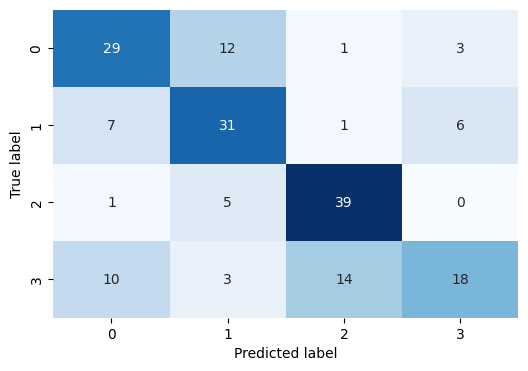

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', OneVsRestClassifier(RandomForestClassifier())) 
])

param_grid = {
    'vectorizer__max_features': [1000, 3000], 
    'vectorizer__ngram_range': [(1, 1), (1, 2)], 
    'classifier__estimator__n_estimators': [50, 100],  
    'classifier__estimator__max_depth': [20, 30, 50],
}

# Create GridSearchCV instance
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Assign model to a variable
best_rfc = grid_search.best_estimator_

# Print the best parameters and corresponding accuracy
print("Best Accuracy: ", grid_search.best_score_)
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Print distribution of y_pred
y_pred = grid_search.predict(X_test)
print('Class Distribution')
print(pd.Series(y_pred).value_counts(normalize=True))

conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

Now we will use the best performing model to predict the Kaggle test set

In [27]:
# Load a model
best_model = best_lr

# Fit the model
best_model.fit(X_train, y_train)

# Load the Kaggle test set
kaggle_test = pd.read_csv('../Datasets/Kaggle/kaggle_test_cleaned.csv')

# Make predictions on the Kaggle test set
kaggle_test_pred = best_model.predict(kaggle_test['body'])

kaggle_test_dict = {
    'id': kaggle_test['id'],
    'subreddit': kaggle_test_pred
}

kaggle_test_df = pd.DataFrame(kaggle_test_dict)
kaggle_test_df['subreddit'] = kaggle_test_df['subreddit'].map({0: 'Toronto', 1: 'London', 2: 'Paris', 3: 'Montreal'})

# Save the predictions to a CSV file
kaggle_test_df.to_csv('../Datasets/Kaggle/kaggle_test_predictions.csv', index=False)

# See distribution of classes in Kaggle test set
print(kaggle_test_df['subreddit'].value_counts(normalize=True))

# Make df of kaggle test and predictions
kaggle_test_df = pd.DataFrame(kaggle_test)
kaggle_test_df['subreddit'] = kaggle_test_pred
kaggle_test_df['subreddit'] = kaggle_test_df['subreddit'].map({0: 'Toronto', 1: 'London', 2: 'Paris', 3: 'Montreal'})

subreddit
London      0.347670
Toronto     0.250896
Paris       0.250896
Montreal    0.150538
Name: proportion, dtype: float64
